<a href="https://colab.research.google.com/github/muralikandan/aiml-assignment-5/blob/main/prompt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [ ]:
data = pd.read_csv('data/coupons.csv')

In [ ]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [ ]:
#Getting list of coloumns
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [ ]:
#Get details about numeric columns
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Get column wise data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [ ]:
#To Identify column wise null values count
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [ ]:
# 91% of 'Car' column is null, considering that dropping that column make sense
data = data.drop(columns= ['car'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [ ]:
data['RestaurantLessThan20'].value_counts()

1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: RestaurantLessThan20, dtype: int64

In [ ]:
data['coupon'].value_counts()

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64

In [ ]:
data[data['Y']==1]['income'].value_counts()

$25000 - $37499     1194
$12500 - $24999     1052
$37500 - $49999     1018
$100000 or More     1004
$50000 - $62499      988
Less than $12500     618
$87500 - $99999      476
$62500 - $74999      446
$75000 - $87499      414
Name: income, dtype: int64

In [ ]:
df = data[['destination', 'passanger',
           #'weather',
           'temperature', 'time', 'coupon',
       'expiration', 'gender',
           'age',
           'maritalStatus', 'has_children',
           'education', #'occupation',
           'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       #'direction_same', 'direction_opp',
           'Y']]


4. What proportion of the total observations chose to accept the coupon?



In [ ]:
# What proportion of the total observations chose to accept the coupon
accptpercent = (data[data['Y']==1].count() / len(data))*100
accptpercent[1] = round(accptpercent[1],2)
print(f"The proportion of the total observations chose to accept the coupon : {accptpercent[1]}%")

The proportion of the total observations chose to accept the coupon : 56.84%


5. Use a bar plot to visualize the `coupon` column.

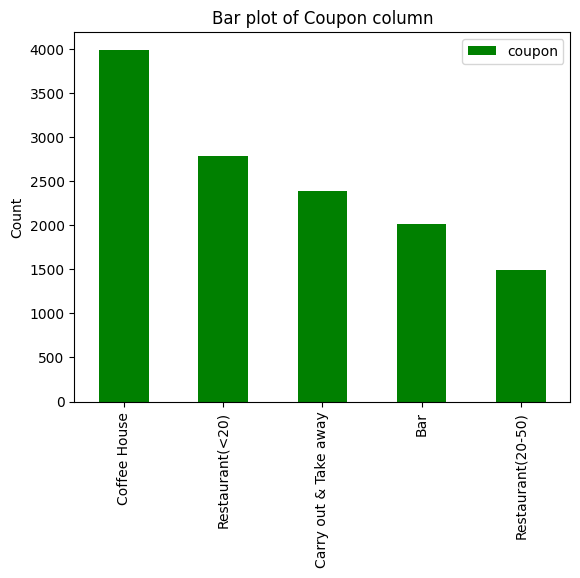

In [ ]:
# Coupon column value count in bar plot
ax= data['coupon'].value_counts().plot(kind='bar',title='Bar plot of Coupon column', legend=True, color='green')
ax.set_ylabel('Count')
plt.show()

6. Use a histogram to visualize the temperature column.

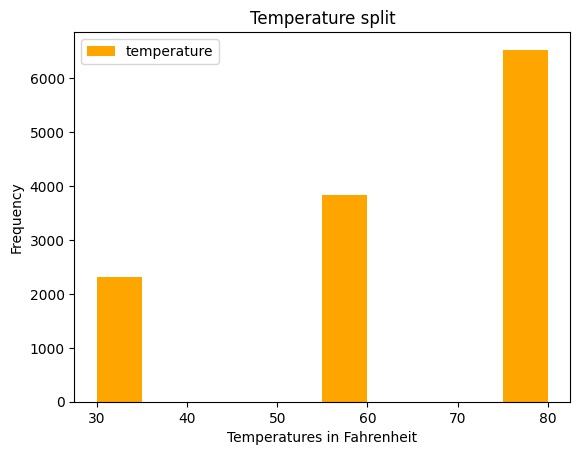

In [ ]:
# Histogram to visualize the temperature column.
ax = data.temperature.plot(kind='hist',legend=True, color='orange')
ax.set_xlabel('Temperatures in Fahrenheit')
ax.set_title('Temperature split')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [ ]:
# DataFrame that contains just the bar coupons.
data_bar = data[(data['coupon'] == 'Bar')]

2. What proportion of bar coupons were accepted?


In [ ]:
#Function to calculate acceptance rate in % and round to 2 decimals by taking value count series
def calculate_accp_rate (value_count_series):
  total_count = value_count_series.sum()
  accp_rate = round((value_count_series[1]/total_count)*100,2)
  return accp_rate

# Proportion of bar coupons were accepted
#data['Bar'].value_counts() / len(data)
bar_coupon_accepted_status = data_bar['Y'].value_counts()
bar_coup_accp_per = calculate_accp_rate(bar_coupon_accepted_status)
print(f"{bar_coup_accp_per}% of bar coupons were accepted.")

41.0% of bar coupons were accepted.


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [ ]:
bar_coupon_accepted_status

0    1190
1     827
Name: Y, dtype: int64

In [ ]:
#Acceptance rate between those who went to a bar 3 or fewer times a month
bar_3_fewer_accp = data_bar[(data_bar['Bar'].isin(['1~3','less1','never']))]['Y'].value_counts()
bar_3_fewer_accp_rate = calculate_accp_rate (bar_3_fewer_accp)

#Acceptance rate between those who went to a bar more than 3 times a month
bar_3_more_accp = data_bar[(data_bar['Bar'].isin(['4~8','gt8']))]['Y'].value_counts()
bar_3_more_accp_rate = calculate_accp_rate (bar_3_more_accp)

bar_accp_ratio = bar_3_fewer_accp_rate/bar_3_more_accp_rate
bar_accp_ratio = round(bar_accp_ratio,2)

print(f"{bar_3_fewer_accp_rate}% bar coupon accepted by those who went to a bar 3 or fewer times a month.")
print(f"{bar_3_more_accp_rate}% bar coupon accepted by those who went more than 3 times a month.")

37.06% bar coupon accepted by those who went to a bar 3 or fewer times a month.
76.88% bar coupon accepted by those who went more than 3 times a month.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [ ]:
#Histogram of bar coupon acceptance count by age & based on per month bar visits
data_bar_sorted = data_bar.query('Y==1')['Bar'].value_counts().sort_values(ascending=False)
fig = px.histogram(data_bar.query('Y==1'),x='Bar',color='age',category_orders={'Bar':data_bar_sorted.index})
# Cutomize the plot
fig.update_layout(title = 'Bar coupon acceptance count by age & bar visits',
                  xaxis_title = 'Bar Visits',
                  yaxis_title='Count',
                  legend_title = 'Age')
#Show the plot
fig.show()

In [ ]:
#Acceptance rate in % for driver those who went to a bar 3 or more times a month and age above 25
over_25_age_1_more_accp = data_bar.query('Bar in ("1~3","4~8","gt8") and '
                                            'age not in ("21","below21")')['Y'].value_counts()
over_25_age_1_more_accp_rate = calculate_accp_rate(over_25_age_1_more_accp)

#Acceptance rate in % for driver those who went to a bar 3 or more times a month and age below 25
below_25_age_1_more_accp = data_bar.query('Bar in ("1~3","4~8","gt8") and '
                                            'age in ("21","below21")')['Y'].value_counts()
below_25_age_1_more_accp_rate = calculate_accp_rate(below_25_age_1_more_accp)

#Acceptance rate in % for driver those who went to a bar less than 1 times a month and age above 25
over_25_age_below_1_accp = data_bar.query('Bar not in ("1~3","4~8","gt8") and age not in ("21","below21")')['Y'].value_counts()
over_25_age_below_1_fewer_accp_rate = calculate_accp_rate(over_25_age_below_1_accp)

#Acceptance rate in % for driver those who went to a bar less than 1 times a month and age below 25
below_25_age_below_1_accp = data_bar.query('Bar not in ("1~3","4~8","gt8") and age in ("21","below21")')['Y'].value_counts()
below_25_age_below_1_accp_rate = calculate_accp_rate(below_25_age_below_1_accp)

print(f"{over_25_age_1_more_accp_rate}% bar coupon accepted by driver over 25 and those who went to more than once to bar in a month.")
print(f"{below_25_age_1_more_accp_rate}% bar coupon accepted by driver less than 25 and those who went to more than once to a bar in a month.")
print(f"{over_25_age_below_1_fewer_accp_rate}% bar coupon accepted by driver over 25 and those who went to less than one or never to bar in a month.")
print(f"{below_25_age_below_1_accp_rate}% bar coupon accepted by driver less than 25 and those who went less than one or never to bar in a month.")



69.52% bar coupon accepted by driver over 25 and those who went to more than once to bar in a month.
67.05% bar coupon accepted by driver less than 25 and those who went to more than once to a bar in a month.
26.35% bar coupon accepted by driver over 25 and those who went to less than one or never to bar in a month.
39.33% bar coupon accepted by driver less than 25 and those who went less than one or never to bar in a month.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [ ]:
data_bar['passanger'].value_counts()

Alone        1200
Friend(s)     337
Partner       274
Kid(s)        206
Name: passanger, dtype: int64

In [ ]:
data_bar['occupation'].value_counts()

Unemployed                                   301
Student                                      251
Computer & Mathematical                      232
Sales & Related                              178
Education&Training&Library                   140
Management                                   119
Office & Administrative Support              105
Arts Design Entertainment Sports & Media     100
Business & Financial                          89
Retired                                       75
Food Preparation & Serving Related            48
Community & Social Services                   44
Healthcare Support                            44
Healthcare Practitioners & Technical          41
Transportation & Material Moving              35
Legal                                         34
Architecture & Engineering                    27
Personal Care & Service                       27
Protective Service                            27
Construction & Extraction                     24
Life Physical Social

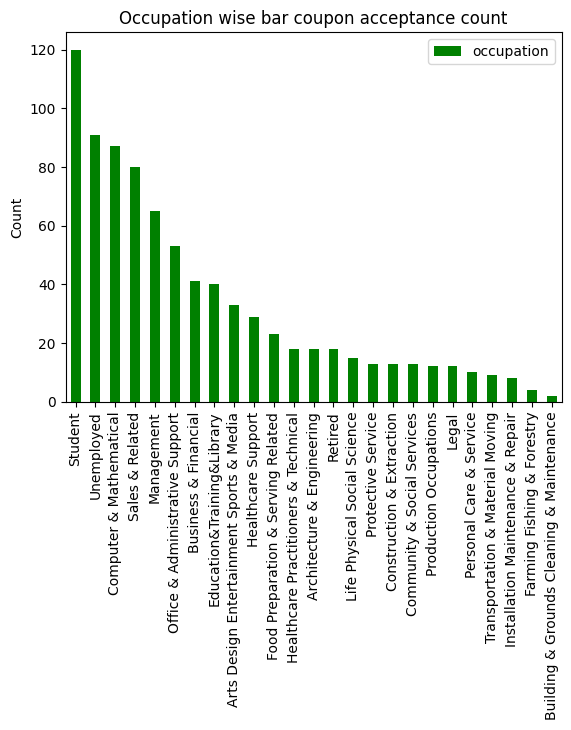

In [ ]:
#Occupation wise bar coupon acceptance count with out any kids passanger
data_bar.query('Y==1 and passanger !="kid(s)"')['occupation'].value_counts().plot(kind='bar',rot=90, color ='green',legend= True)
plt.title('Occupation wise bar coupon acceptance count')
plt.ylabel('Count')
plt.show()

In [ ]:
#Acceptance rate in % for driver those who went to a bar more than once a month and occupations other than farming, fishing, or forestry
more_1_visit_other_occp_accp = data_bar.query('Bar in ("1~3","4~8","gt8") and '
                                              'passanger != "kid(s)" and occupation != "Farming Fishing & Forestry"')['Y'].value_counts()
more_1_visit_other_occp_accp_rate = calculate_accp_rate(more_1_visit_other_occp_accp)

#Acceptance rate in % for driver those who went to a bar less than once a month and occupations other than farming, fishing, or forestry
less_1_visit_other_occp_accp = data_bar.query('Bar not in ("1~3","4~8","gt8") and passanger != "kid(s)" and occupation != "Farming Fishing & Forestry"')['Y'].value_counts()
less_1_visit_other_occp_accp_rate = calculate_accp_rate(less_1_visit_other_occp_accp)

#Acceptance rate  for driver those who went to a bar more than once a month and occupations in farming, fishing, or forestry
more_1_visit_farm_occp_accp = data_bar.query('Bar in ("1~3","4~8","gt8") and '
                                              'passanger != "kid(s)"and occupation == "Farming Fishing & Forestry" ')['Y'].value_counts()

#Acceptance rate in % for driver those who went to a bar less than once a month and occupations in farming, fishing, or forestry
less_1_visit_farm_occp_accp = data_bar.query('Bar not in ("1~3","4~8","gt8") and '
                                              'passanger != "kid(s)" and occupation == "Farming Fishing & Forestry"')['Y'].value_counts()
less_1_visit_farm_occp_accp_rate = calculate_accp_rate(less_1_visit_farm_occp_accp)

print(f"{more_1_visit_other_occp_accp_rate}% bar coupon accepted by driver those who went to more than once to bar in a month and in other than Farming Fishing & Forestry occupation.")
print(f"{less_1_visit_other_occp_accp_rate}% bar coupon accepted by driver those who went to less than once to bar in a month and in other than Farming Fishing & Forestry occupation.")
print(f"{more_1_visit_farm_occp_accp.sum()}% bar coupon accepted by driver those who went to more than once to bar in a month and in Farming Fishing & Forestry occupation.")
print(f"{less_1_visit_farm_occp_accp_rate}% bar coupon accepted by driver those who went to less than once to bar in a month and in Farming Fishing & Forestry occupation.")


68.79% bar coupon accepted by driver those who went to more than once to bar in a month and in other than Farming Fishing & Forestry occupation.
29.25% bar coupon accepted by driver those who went to less than once to bar in a month and in other than Farming Fishing & Forestry occupation.
0% bar coupon accepted by driver those who went to more than once to bar in a month and in Farming Fishing & Forestry occupation.
44.44% bar coupon accepted by driver those who went to less than once to bar in a month and in Farming Fishing & Forestry occupation.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [ ]:
#Acceptance rate in % for driver those who go to bars more than once a month, had passengers that were not a kid, and were not widowed
more_1_visit_not_widow_accp = data_bar.query('Bar in ("1~3","4~8","gt8") and '
                                              'passanger != "kid(s)" and maritalStatus != "Widowed"')['Y'].value_counts()
more_1_visit_not_widow_accp_rate = calculate_accp_rate(more_1_visit_not_widow_accp)

#Acceptance rate in % for driver those who go to bars more than once a month and are under the age of 30
more_1_visit_under_30_accp = data_bar.query('Bar in ("1~3","4~8","gt8") and '
                                              'age in ("21","below21","26")')['Y'].value_counts()
more_1_visit_under_30_accp_rate = calculate_accp_rate(more_1_visit_under_30_accp)


#Acceptance rate in % for driver those who go to cheap restaurants more than 4 times a month and income is less than 50K
more_4__cheap_restaurants_visit_under_50k_accp = data_bar.query('RestaurantLessThan20 in ("4~8","gt8") and '
                                              'income in ("$25000 - $37499","$12500 - $24999","$37500 - $49999","Less than $12500")')['Y'].value_counts()
more_4__cheap_restaurants_visit_under_50k_accp_rate = calculate_accp_rate(more_4__cheap_restaurants_visit_under_50k_accp)


print(f"{more_1_visit_not_widow_accp_rate}% bar coupon accepted by driver those who go to bars more than once a month, had passengers that were not a kid, and were not widowed.")
print(f"{more_1_visit_under_30_accp_rate}% bar coupon accepted by driver those who go to bars more than once a month and are under the age of 30.")
print(f"{more_4__cheap_restaurants_visit_under_50k_accp_rate}% bar coupon accepted by driver those who go to cheap restaurants more than 4 times a month and income is under 50K income.")


68.79% bar coupon accepted by driver those who go to bars more than once a month, had passengers that were not a kid, and were not widowed.
72.17% bar coupon accepted by driver those who go to bars more than once a month and are under the age of 30.
45.35% bar coupon accepted by driver those who go to cheap restaurants more than 4 times a month and income is under 50K income.


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Hypothesis based on various exploration about bar coupon acceptance**

**Hypothesis 1 :** - Drivers who go to a bar more than 3 times a month have a significantly higher bar coupon acceptance rate than those who got to a bar less than 3 times a month.

**Hypothesis 2 :** - Bar visit habbit has positive influence than driver's age in bar coupon acceptance.

**Hypothesis 3 :** - Drivers travel with kids not at all influence to bar coupon accepting. Occupation - Farming Fishing & Forestry occupation has less influence to bar coupon acceptance rate where as over all rest of occupation has more influence.

**Hypothesis 4 :** - Bar visit habbit has positive influence than driver's age or marital status in bar coupon acceptance. Cheap restaurants visit habbit with less than 50K income has reasonable impact to bar coupon acceptance rate.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [ ]:
# 1 DataFrame that contains just the cofee  coupons.
data_coffee = data[(data['coupon'] == 'Coffee House')]
data_coffee.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0


In [ ]:
# 2 What proportion of coffee coupons were accepted?
# Proportion of coffee coupons were accepted
coffee_coupon_accepted_status = data_coffee['Y'].value_counts()
coffee_coup_accp_per = calculate_accp_rate(coffee_coupon_accepted_status)
print(f"{coffee_coup_accp_per}% of coffee coupons were accepted.")

49.92% of coffee coupons were accepted.


In [ ]:
data_coffee['CoffeeHouse'].value_counts()

less1    1075
1~3      1042
never     927
4~8       538
gt8       342
Name: CoffeeHouse, dtype: int64

In [ ]:
# 3 Compare the acceptance rate between those who went to a coffee 3 or fewer times a month to those who went more.
#Acceptance rate between those who went to a coffee 3 or fewer times a month
coffee_3_fewer_accp = data_coffee[(data_coffee['CoffeeHouse'].isin(['1~3','less1','never']))]['Y'].value_counts()
coffee_3_fewer_accp_rate = calculate_accp_rate (coffee_3_fewer_accp)

#Acceptance rate between those who went to a coffee more than 3 times a month
coffee_3_more_accp = data_coffee[(data_coffee['CoffeeHouse'].isin(['4~8','gt8']))]['Y'].value_counts()
coffee_3_more_accp_rate = calculate_accp_rate (coffee_3_more_accp)

coffee_accp_ratio = coffee_3_fewer_accp_rate/coffee_3_more_accp_rate
coffee_accp_ratio = round(coffee_accp_ratio,2)

print(f"{coffee_3_fewer_accp_rate}% coffee coupon accepted by those who went to a coffee 3 or fewer times a month.")
print(f"{coffee_3_more_accp_rate}% coffee coupon accepted by those those who went more than 3 times a month.")

44.94% coffee coupon accepted by those who went to a coffee 3 or fewer times a month.
67.5% coffee coupon accepted by those those who went more than 3 times a month.


In [ ]:
# 4 Compare the acceptance rate between drivers who go to a coffee more than once a month and are over the age of 25 to the all others. Is there a difference?

data_coffee_sorted = data_coffee.query('Y==1')['CoffeeHouse'].value_counts().sort_values(ascending=False)
fig = px.histogram(data_coffee.query('Y==1'),x='CoffeeHouse',color='age',category_orders={'CoffeeHouse':data_coffee_sorted.index})
# Cutomize the plot
fig.update_layout(title = 'Coffee coupon acceptance count by age & coffee house visits',
                  xaxis_title = 'CoffeeHouse Visits',
                  yaxis_title='Count',
                  legend_title = 'Age')
#Show the plot
fig.show()

In [ ]:
#Acceptance rate in % for driver those who went to a coffee more than once a month and age above 25
over_25_age_1_more_coffee_accp = data_coffee.query('CoffeeHouse in ("1~3","4~8","gt8") and '
                                            'age not in ("21","below21")')['Y'].value_counts()
over_25_age_1_more_coffee_accp_rate = calculate_accp_rate(over_25_age_1_more_coffee_accp)

#Acceptance rate in % for driver those who went to a coffee more than once a month and age below 25
below_25_age_1_more_coffee_accp = data_coffee.query('CoffeeHouse in ("1~3","4~8","gt8") and '
                                            'age in ("21","below21")')['Y'].value_counts()
below_25_age_1_more_coffee_accp_rate = calculate_accp_rate(below_25_age_1_more_coffee_accp)

#Acceptance rate in % for driver those who went to a coffee less than 1 times a month and age above 25
over_25_age_below_1_coffee_accp = data_coffee.query('CoffeeHouse not in ("1~3","4~8","gt8") and age not in ("21","below21")')['Y'].value_counts()
over_25_age_below_1_fewer_coffee_accp_rate = calculate_accp_rate(over_25_age_below_1_coffee_accp)

#Acceptance rate in % for driver those who went to a coffee less than 1 times a month and age below 25
below_25_age_below_1_coffee_accp = data_coffee.query('CoffeeHouse not in ("1~3","4~8","gt8") and age in ("21","below21")')['Y'].value_counts()
below_25_age_below_1_coffee_accp_rate = calculate_accp_rate(below_25_age_below_1_coffee_accp)

print(f"{over_25_age_1_more_coffee_accp_rate}% coffee coupon accepted by driver over 25 and those who went to more than once to coffee house in a month.")
print(f"{below_25_age_1_more_coffee_accp_rate}% coffee coupon accepted by driver less than 25 and those who went to more than once to a coffee house in a month.")
print(f"{over_25_age_below_1_fewer_coffee_accp_rate}% coffee coupon accepted by driver over 25 and those who went to less than one or never to coffee house in a month.")
print(f"{below_25_age_below_1_coffee_accp_rate}% coffee coupon accepted by driver less than 25 and those who went less than one or never to coffee house in a month.")

63.84% coffee coupon accepted by driver over 25 and those who went to more than once to coffee house in a month.
71.28% coffee coupon accepted by driver less than 25 and those who went to more than once to a coffee house in a month.
34.81% coffee coupon accepted by driver over 25 and those who went to less than one or never to coffee house in a month.
35.65% coffee coupon accepted by driver less than 25 and those who went less than one or never to coffee house in a month.


In [ ]:
#5 Use the same process to compare the acceptance rate between drivers who go to coffee house more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
data_coffee['passanger'].value_counts()

Alone        2256
Friend(s)    1228
Partner       305
Kid(s)        207
Name: passanger, dtype: int64

In [ ]:
# Occupation wise value count on coffee house coupon data frame
data_coffee['occupation'].value_counts()

Unemployed                                   570
Student                                      499
Computer & Mathematical                      449
Sales & Related                              355
Management                                   298
Education&Training&Library                   296
Arts Design Entertainment Sports & Media     209
Office & Administrative Support              197
Retired                                      164
Business & Financial                         146
Food Preparation & Serving Related            83
Transportation & Material Moving              76
Community & Social Services                   74
Healthcare Practitioners & Technical          74
Legal                                         69
Healthcare Support                            65
Architecture & Engineering                    63
Life Physical Social Science                  61
Protective Service                            58
Personal Care & Service                       50
Construction & Extra

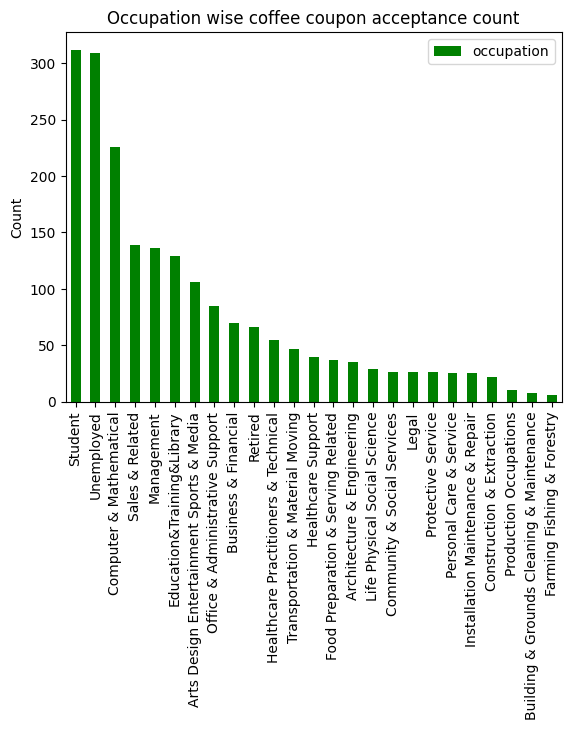

In [ ]:
#Bar plot : Occupation wise coffee coupon acceptance count with out any kids passanger
data_coffee.query('Y==1 and passanger !="kid(s)"')['occupation'].value_counts().plot(kind='bar',rot=90, color ='green',legend= True)
plt.title('Occupation wise coffee coupon acceptance count')
plt.ylabel('Count')
plt.show()

In [ ]:
#Acceptance rate in % for driver those who went to a coffee house more than once a month and occupations other than farming, fishing, or forestry
more_1_visit_other_occp_coffee_accp = data_coffee.query('CoffeeHouse in ("1~3","4~8","gt8") and '
                                              'passanger != "kid(s)" and occupation != "Farming Fishing & Forestry"')['Y'].value_counts()
more_1_visit_other_occp_coffee_accp_rate = calculate_accp_rate(more_1_visit_other_occp_coffee_accp)

#Acceptance rate in % for driver those who went to a coffee house less than once a month and occupations other than farming, fishing, or forestry
less_1_visit_other_occp_coffee_accp = data_coffee.query('CoffeeHouse not in ("1~3","4~8","gt8") and passanger != "kid(s)" and occupation != "Farming Fishing & Forestry"')['Y'].value_counts()
less_1_visit_other_occp_coffee_accp_rate = calculate_accp_rate(less_1_visit_other_occp_coffee_accp)

#Acceptance rate  for driver those who went to a coffee house more than once a month and occupations in farming, fishing, or forestry
more_1_visit_farm_occp_coffee_accp = data_coffee.query('CoffeeHouse in ("1~3","4~8","gt8") and '
                                              'passanger != "kid(s)"and occupation == "Farming Fishing & Forestry" ')['Y'].value_counts()

#Acceptance rate in % for driver those who went to a coffee house less than once a month and occupations in farming, fishing, or forestry
less_1_visit_farm_occp_coffee_accp = data_coffee.query('CoffeeHouse not in ("1~3","4~8","gt8") and '
                                              'passanger != "kid(s)" and occupation == "Farming Fishing & Forestry"')['Y'].value_counts()
less_1_visit_farm_occp_coffee_accp_rate = calculate_accp_rate(less_1_visit_farm_occp_coffee_accp)

print(f"{more_1_visit_other_occp_coffee_accp_rate}% coffee coupon accepted by driver those who went to more than once to coffee house in a month and in other than Farming Fishing & Forestry occupation.")
print(f"{less_1_visit_other_occp_coffee_accp_rate}% coffee coupon accepted by driver those who went to less than once to coffee house in a month and in other than Farming Fishing & Forestry occupation.")
print(f"{more_1_visit_farm_occp_coffee_accp.sum()} coffee coupon accepted by driver those who went to more than once to coffee house in a month and in Farming Fishing & Forestry occupation.")
print(f"{less_1_visit_farm_occp_coffee_accp_rate}% coffee coupon accepted by driver those who went to less than once to coffee house in a month and in Farming Fishing & Forestry occupation.")

66.02% coffee coupon accepted by driver those who went to more than once to coffee house in a month and in other than Farming Fishing & Forestry occupation.
34.9% coffee coupon accepted by driver those who went to less than once to coffee house in a month and in other than Farming Fishing & Forestry occupation.
0 coffee coupon accepted by driver those who went to more than once to coffee house in a month and in Farming Fishing & Forestry occupation.
54.55% coffee coupon accepted by driver those who went to less than once to coffee house in a month and in Farming Fishing & Forestry occupation.


In [ ]:
#6 Compare the acceptance rates between those drivers who:
    #go to coffee house more than once a month, had passengers that were not a kid, and were not widowed OR
    #go to coffee house more than once a month and are under the age of 30 OR
    #go to cheap restaurants more than 4 times a month and income is less than 50K.

#Acceptance rate in % for driver those who go to coffeehouse more than once a month, had passengers that were not a kid, and were not widowed
more_1_visit_not_widow_coffee_accp = data_bar.query('CoffeeHouse in ("1~3","4~8","gt8") and '
                                              'passanger != "kid(s)" and maritalStatus != "Widowed"')['Y'].value_counts()
more_1_visit_not_widow_accp_coffee_rate = calculate_accp_rate(more_1_visit_not_widow_coffee_accp)

#Acceptance rate in % for driver those who go to coffeehouse more than once a month and are under the age of 30
more_1_visit_under_30_coffee_accp = data_bar.query('CoffeeHouse in ("1~3","4~8","gt8") and '
                                              'age in ("21","below21","26")')['Y'].value_counts()
more_1_visit_under_30_accp_rate = calculate_accp_rate(more_1_visit_under_30_coffee_accp)


#Acceptance rate in % for driver those who go to cheap restaurants more than 4 times a month and income is less than 50K
more_4__cheap_restaurants_visit_under_50k_coffee_accp = data_bar.query('RestaurantLessThan20 in ("4~8","gt8") and '
                                              'income in ("$25000 - $37499","$12500 - $24999","$37500 - $49999","Less than $12500")')['Y'].value_counts()
more_4__cheap_restaurants_visit_under_50k__coffee_accp_rate = calculate_accp_rate(more_4__cheap_restaurants_visit_under_50k_coffee_accp)


print(f"{more_1_visit_not_widow_accp_rate}% coffee coupon accepted by driver those who go to coffee house more than once a month, had passengers that were not a kid, and were not widowed.")
print(f"{more_1_visit_under_30_accp_rate}% coffee coupon accepted by driver those who go to coffee house more than once a month and are under the age of 30.")
print(f"{more_4__cheap_restaurants_visit_under_50k_accp_rate}% coffee coupon accepted by driver those who go to cheap restaurants more than 4 times a month and income is under 50K income.")

68.79% coffee coupon accepted by driver those who go to coffee house more than once a month, had passengers that were not a kid, and were not widowed.
54.8% coffee coupon accepted by driver those who go to coffee house more than once a month and are under the age of 30.
45.35% coffee coupon accepted by driver those who go to cheap restaurants more than 4 times a month and income is under 50K income.


**Hypothesis based on various exploration about coffee coupon acceptance**

**Hypothesis 1**: Half of coffee coupons accepted by drivers, especially who frequent visitors of coffee house more than 3 times a month have a significantly higher coffee coupon acceptance rate than who visit less than 3 times a month to coffee house.

**Hypothesis 2**: Habit of frequent visitors to coffee house have much influence than driver's age in coffee coupon acceptance rate.

**Hypothesis 3**: Drivers who go to a coffee house more than once a month and have an occupation other than Farming, Fishing & Foresty have a significantly higher coffee coupon acceptance rate.

**Hypothesis 4**: Drivers with kids passanger or their marital status doesn have much influence to coffee coupon acceptance rate.

**Hypothesis 5**: Drivers go to cheap restuarant and income less than 50K has resonable influence to coffee coupon acceptance rate.